In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from kalmanfilter import KalmanFilter

In [3]:
plt.style.use('https://gist.githubusercontent.com/Xylambda/4521dc6404594a715bbc7b75e8c1e2e1/raw/f4f466b27955169abd934428ed98c2be2e1201f2/bpyplot')

In [4]:
def generate_func(start, end, step, beta, var):
    """
    Generate a noisy sine wave function
    
    Parameters
    ----------
    start : int
        Initial X value.
    end : int
        Final X value.
    step : float or int
        Space between values.
    beta : float or int
        Slope of the sine wave.
    var : float or int
        Noise variance.
        
    Returns
    -------
    Z : numpy.array
        Noisy sine wave.
    """
    _space = np.arange(start=-10, stop=10, step=0.1)
    _sin = np.sin(_space)
   
    return np.array([beta*x + var*np.random.randn() for x in range(len(_space))]) + _sin

In [5]:
Z = generate_func(start=-10, end=10, step=0.1, beta=0.02, var=0.3)
A = np.array([[1]])
xk = np.array([[1]])

B = np.array([[0]])
U = np.zeros((len(Z), 1))

Pk = np.array([[1]])
Q = 0.005

H = np.array([[1]])
R = 0.01

In [6]:
kf = KalmanFilter(A=A, xk=xk, B=B, Pk=Pk, H=H, Q=Q, R=R)
states, errors = kf.run_filter(Z, U)

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


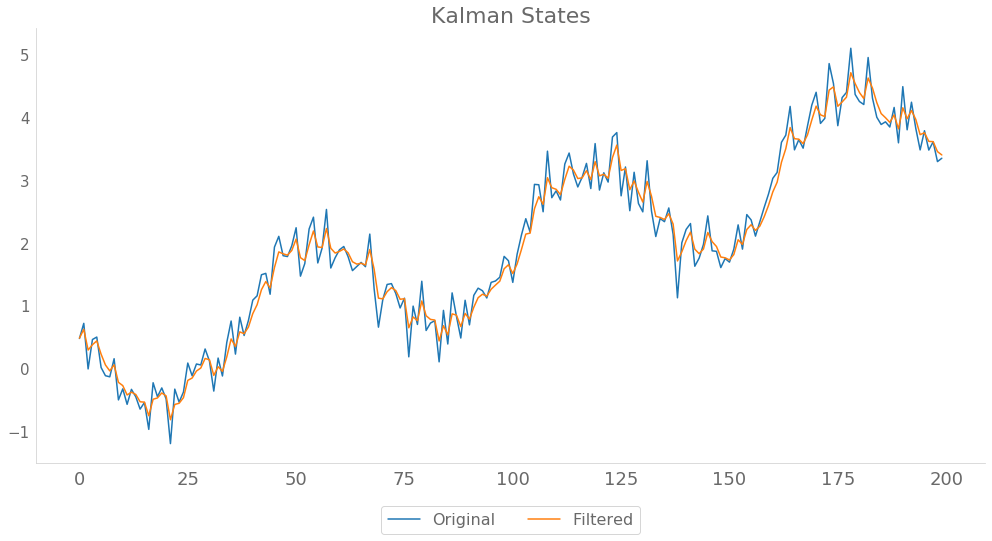

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(17,8))

ax.plot(Z)
ax.plot(states)
ax.legend(['Original', 'Filtered'], bbox_to_anchor=[0.5, -0.13], loc='center', ncol=2, prop={'size': 16})
ax.set_title("Kalman States", fontsize=22)
ax.set_xlabel("");

plt.xticks(rotation=0, fontsize=18);
plt.yticks(fontsize=15);